<a href="https://colab.research.google.com/github/shrookehab/Machine_Learning2/blob/main/K_Means_Clustering/K_means_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/shrookehab/Machine_Learning2.git
%cd   Machine_Learning2/K_Means_Clustering

Cloning into 'Machine_Learning2'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 40 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.
/content/Machine_Learning2/K_Means_Clustering/Machine_Learning2/K_Means_Clustering


# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [4]:
#read the data

data_path = './CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febb545da50>,
      dtype=object)

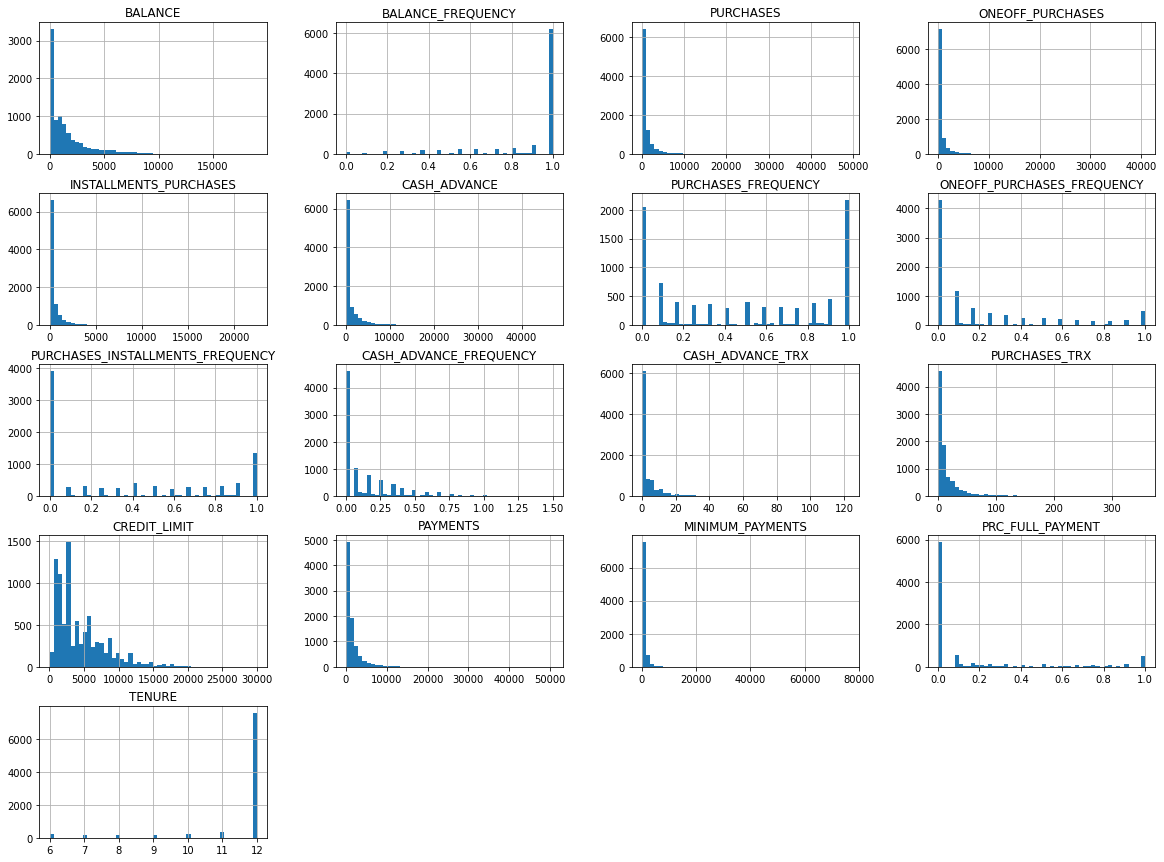

In [9]:
# feel free to investigate what you want
df.hist(bins=50, figsize=(20,15))

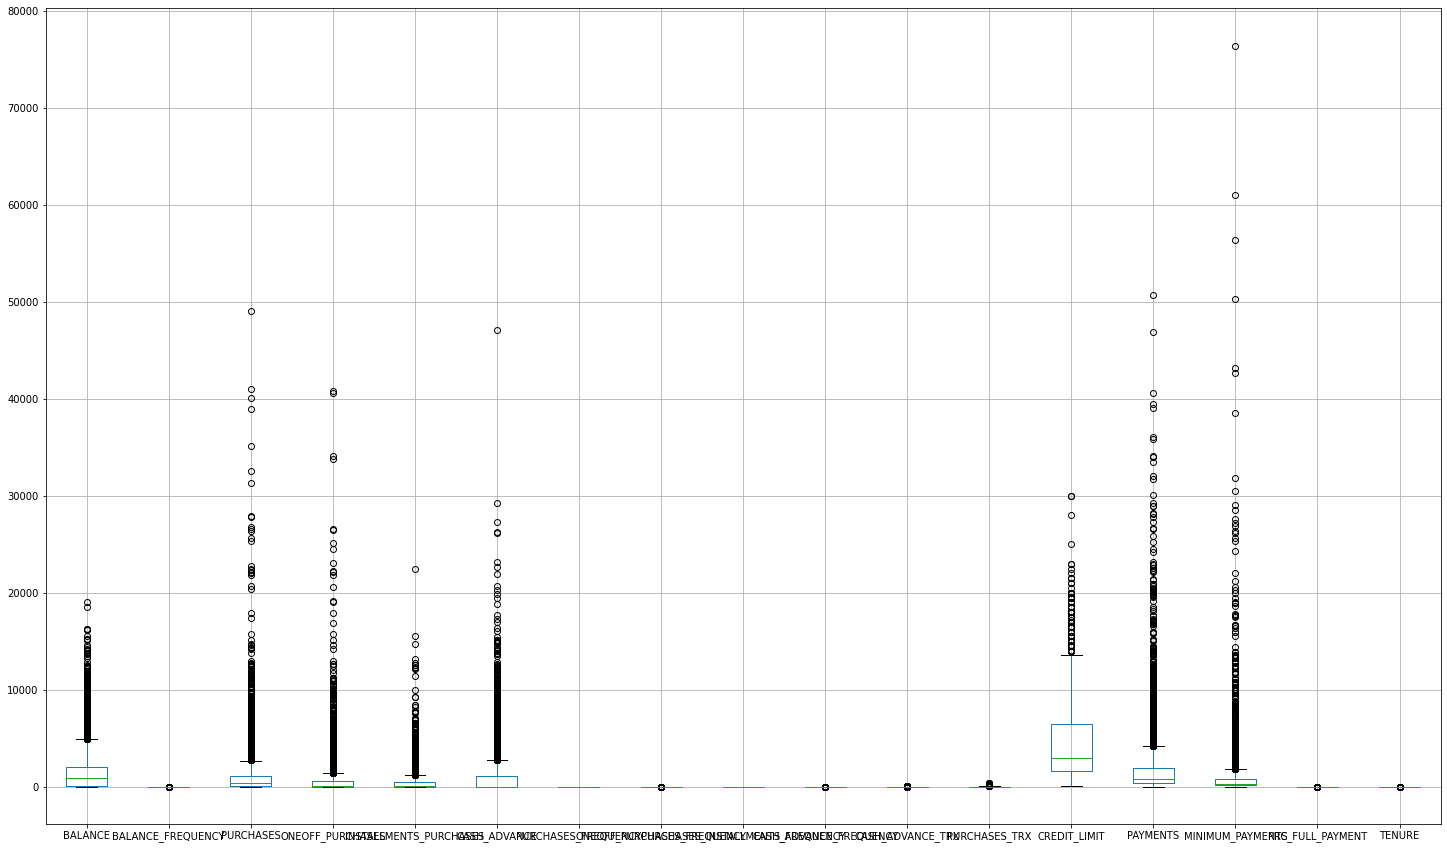

In [21]:
df.boxplot(figsize=(25,15))

In [38]:
df.duplicated().sum()

0

In [39]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Removing Null Values           <br>
2- Detecting and Removing Outliers         <br>
3-            <br>

In [51]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

1- Removing Null Values

In [52]:
#solution 
median_of_credit = df_copy['CREDIT_LIMIT'].median()
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(median_of_credit)
data_after_cleaning = df_copy.dropna()

In [53]:
#test 
data_after_cleaning.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [54]:
data_after_cleaning

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Second issue**

2- Detecting and Removing Outliers

In [55]:
#solution 
Q1 = data_after_cleaning.quantile(0.25)
Q3 = data_after_cleaning.quantile(0.75)
IQR = Q3 - Q1
IQR

BALANCE                             1957.123354
BALANCE_FREQUENCY                      0.090909
PURCHASES                           1102.550000
ONEOFF_PURCHASES                     598.950000
INSTALLMENTS_PURCHASES               484.040000
CASH_ADVANCE                        1131.986387
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.333333
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.250000
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         17.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1532.669806
MINIMUM_PAYMENTS                     656.361752
PRC_FULL_PAYMENT                       0.166667
TENURE                                 0.000000
dtype: float64

In [56]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
(data_after_cleaning < lower) | (data_after_cleaning > upper)

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,CUST_ID,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8945,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [57]:
data_after_cleaning = data_after_cleaning[~((data_after_cleaning < lower) | (data_after_cleaning > upper)).any(axis=1)]
data_after_cleaning

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
11,C10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,C18976,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.000000,12
8742,C18980,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12
8747,C18986,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.333333,12
8759,C18998,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.300000,12


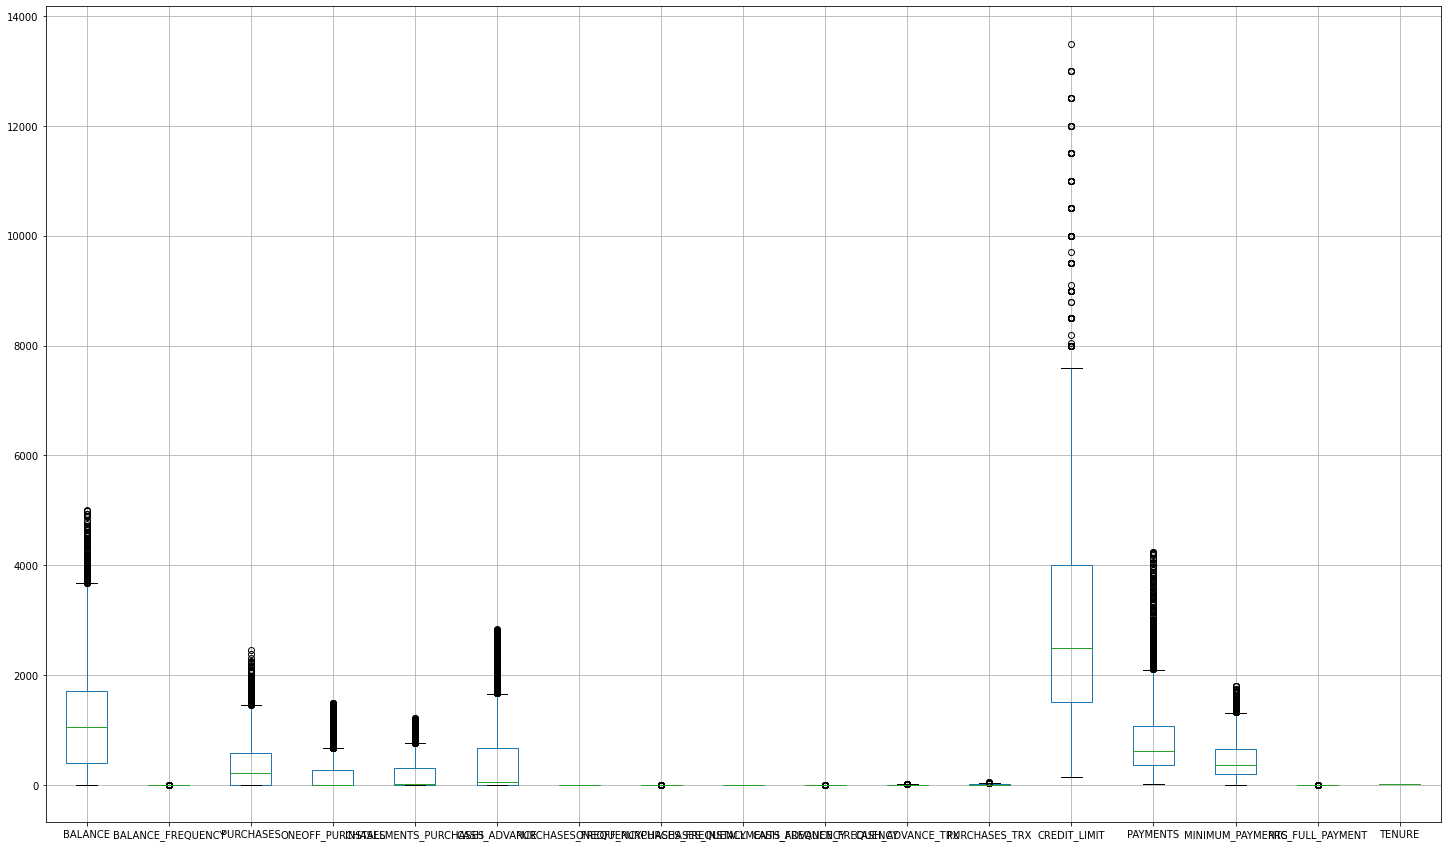

In [58]:
#test 
data_after_cleaning.boxplot(figsize=(25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febaeb92590>,
      dtype=object)

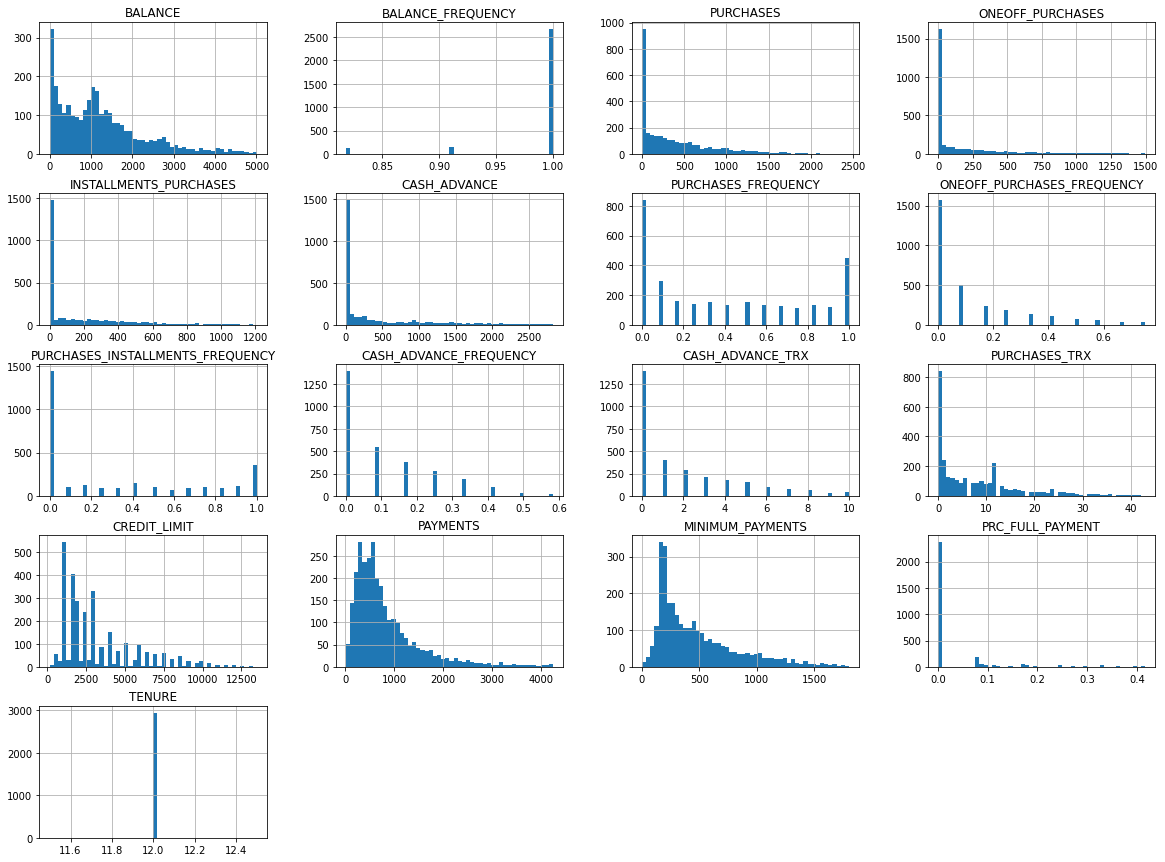

In [59]:
data_after_cleaning.hist(bins=50, figsize=(20,15))

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [62]:
from sklearn import preprocessing

In [125]:
data = data_after_cleaning.copy()
data1 = data.copy()
column_id = data['CUST_ID']
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
11,C10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,C18976,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.000000,12
8742,C18980,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12
8747,C18986,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.333333,12
8759,C18998,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.300000,12


In [126]:
columns_names = data.columns[1:18]
columns_names

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [127]:
# Using Standardization, or mean removal and variance scaling
# data12 = data1.drop(columns_names, axis=1)
# preprocessed_data1 = preprocessing.StandardScaler().fit(data[columns_names]).transform(data[columns_names])
# preprocessed_data12 = pd.concat([data12, pd.DataFrame(data=preprocessed_data1, columns=columns_names)], axis=1)
# preprocessed_data12
preprocessed_data1 = preprocessing.MinMaxScaler().fit(data[columns_names]).transform(data[columns_names])
preprocessed_data1 = pd.DataFrame(data=preprocessed_data1, columns=columns_names)
preprocessed_data1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007925,0.0,0.038927,0.000000,0.078919,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,0.046512,0.063670,0.044249,0.075968,0.000000,0.0
1,0.162988,1.0,0.006529,0.010688,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.023256,0.078652,0.156827,0.134510,0.000000,0.0
2,0.363787,1.0,0.177988,0.000000,0.360842,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,0.279070,0.161049,0.157000,0.294234,0.000000,0.0
3,0.202354,1.0,0.351524,0.441871,0.165448,0.00000,0.333333,0.111111,0.250000,0.000000,0.0,0.116279,0.513109,0.159176,0.171862,0.000000,0.0
4,0.125676,0.0,0.608872,0.996767,0.000000,0.00000,0.250000,0.333333,0.000000,0.000000,0.0,0.139535,0.138577,0.163273,0.084887,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.195639,1.0,0.559017,0.915151,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.023256,0.093633,0.137538,0.249500,0.000000,0.0
2947,0.017132,1.0,0.247077,0.000000,0.500910,0.00000,1.000000,0.000000,0.916667,0.000000,0.0,0.279070,0.101124,0.117446,0.095709,0.000000,0.0
2948,0.003040,0.5,0.180150,0.083299,0.262069,0.00000,1.000000,0.222223,0.916667,0.000000,0.0,0.325581,0.063670,0.110574,0.049176,0.799999,0.0
2949,0.013210,1.0,0.120372,0.000000,0.244036,0.00000,0.500000,0.000000,0.416667,0.000000,0.0,0.139535,0.063670,0.054617,0.091324,0.719999,0.0


In [128]:
# Using MinMaxScaler
preprocessed_data2 = preprocessing.MinMaxScaler().fit(data[columns_names]).transform(data[columns_names])
preprocessed_data2 = pd.DataFrame(data=preprocessed_data2, columns=columns_names)
preprocessed_data2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007925,0.0,0.038927,0.000000,0.078919,0.00000,0.166667,0.000000,0.083333,0.000000,0.0,0.046512,0.063670,0.044249,0.075968,0.000000,0.0
1,0.162988,1.0,0.006529,0.010688,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.023256,0.078652,0.156827,0.134510,0.000000,0.0
2,0.363787,1.0,0.177988,0.000000,0.360842,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,0.279070,0.161049,0.157000,0.294234,0.000000,0.0
3,0.202354,1.0,0.351524,0.441871,0.165448,0.00000,0.333333,0.111111,0.250000,0.000000,0.0,0.116279,0.513109,0.159176,0.171862,0.000000,0.0
4,0.125676,0.0,0.608872,0.996767,0.000000,0.00000,0.250000,0.333333,0.000000,0.000000,0.0,0.139535,0.138577,0.163273,0.084887,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.195639,1.0,0.559017,0.915151,0.000000,0.00000,0.083333,0.111111,0.000000,0.000000,0.0,0.023256,0.093633,0.137538,0.249500,0.000000,0.0
2947,0.017132,1.0,0.247077,0.000000,0.500910,0.00000,1.000000,0.000000,0.916667,0.000000,0.0,0.279070,0.101124,0.117446,0.095709,0.000000,0.0
2948,0.003040,0.5,0.180150,0.083299,0.262069,0.00000,1.000000,0.222223,0.916667,0.000000,0.0,0.325581,0.063670,0.110574,0.049176,0.799999,0.0
2949,0.013210,1.0,0.120372,0.000000,0.244036,0.00000,0.500000,0.000000,0.416667,0.000000,0.0,0.139535,0.063670,0.054617,0.091324,0.719999,0.0


In [140]:
# Using Normalizer
preprocessed_data3 = preprocessing.Normalizer().fit(data[columns_names]).transform(data[columns_names])
preprocessed_data3 = pd.DataFrame(data=preprocessed_data3, columns=columns_names)
#preprocessed_data2.insert(0, 'CUST_ID', data['CUST_ID'])
preprocessed_data3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
2,0.584314,0.000320,0.139762,0.000000,0.139762,0.000000,0.000320,0.000000,0.000320,0.000000,0.000000,0.003845,0.736940,0.217578,0.170468,0.000000,0.003845
3,0.140988,0.000139,0.119673,0.091890,0.027783,0.000000,0.000046,0.000012,0.000035,0.000000,0.000000,0.000695,0.972400,0.095612,0.043336,0.000000,0.001667
4,0.206035,0.000267,0.487386,0.487386,0.000000,0.000000,0.000082,0.000082,0.000000,0.000000,0.000000,0.001960,0.653254,0.230474,0.050807,0.000000,0.003920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.364772,0.000372,0.509268,0.509268,0.000000,0.000000,0.000031,0.000031,0.000000,0.000000,0.000000,0.000372,0.520420,0.221805,0.167867,0.000000,0.004461
2947,0.048026,0.000552,0.334160,0.000000,0.334160,0.000000,0.000552,0.000000,0.000506,0.000000,0.000000,0.006622,0.827785,0.282351,0.096582,0.000000,0.006622
2948,0.013184,0.000730,0.354320,0.100076,0.254243,0.000000,0.000803,0.000134,0.000736,0.000000,0.000000,0.011236,0.802536,0.387262,0.073294,0.000268,0.009630
2949,0.059857,0.000888,0.262073,0.000000,0.262073,0.000000,0.000444,0.000000,0.000370,0.000000,0.000000,0.005330,0.888383,0.218266,0.148472,0.000267,0.010661


## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [141]:
class kMeans_Clustering():
  X = []
  K = []

  def __init__(self, X, K):
    self.X = X
    self.K = K

  def kMeansInitCentroids1(self):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    n = self.X.shape[1]
    centroids = np.zeros((self.K, n), dtype=np.float64)
    random_intialization = np.random.choice(self.X.shape[0], self.K, replace=False)
    
    centroids = self.X[random_intialization]

    return centroids

  def findClosestCentroids1(self, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, 1) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """

    
    m = self.X.shape[0]
    k = centroids.shape[0]
    indx = 0
    #print(m)
    #print(k)
    idx = np.zeros((m, 1), dtype=np.float64)
    distance_matrix = np.zeros((k, m), dtype=np.float64)
    for i in centroids:
      distance_matrix[indx,:] = np.linalg.norm(((self.X - i)**2), axis=1)
      indx += 1
    #print(distance_matrix)
    #print(len(distance_matrix[0]))
    idx= np.argmin(distance_matrix, axis=0)
    return idx 

  def computeCentroids1(self, idx):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    #print(K)
    n = self.X.shape[1]
    centroids = np.zeros((self.K, n), dtype=np.float64)
    for i in range(self.K):
      centroids[i, :] = np.mean(self.X[idx.reshape(-1) == i], axis=0)
    return centroids

  def k_kmeans(self, Iterations):
    centroids = self.kMeansInitCentroids1()
    for i in range(Iterations):
      idx = self.findClosestCentroids1(centroids)
      centroids = self.computeCentroids1(idx)
    return centroids

In [142]:
def main():
    kmeans = kMeans_Clustering(preprocessed_data2, 4)
    centroids = kmeans.k_kmeans(100)
    print(centroids)

if __name__ == "__main__":
    main()

KeyError: ignored

In [147]:
from sklearn.cluster import KMeans

In [148]:
kmeansSk = KMeans(n_clusters=4, random_state=0).fit(preprocessed_data2)
print(kmeansSk.labels_)
print(kmeansSk.cluster_centers_)

[0 3 3 ... 1 0 1]
[[1.38955077e-01 2.92829977e-04 1.09239904e-01 4.43043182e-02
  6.49794642e-02 3.74637016e-02 1.65715344e-04 2.82968621e-05
  1.41111486e-04 1.04143009e-05 1.67850696e-04 2.85082373e-03
  9.37183042e-01 1.46619946e-01 6.96807906e-02 1.92478148e-05
  3.59287035e-03]
 [3.08472985e-01 4.55215855e-04 3.58654115e-01 1.88988129e-01
  1.70051523e-01 3.61208961e-02 3.22601305e-04 1.02411002e-04
  2.51950448e-04 1.84676763e-05 3.18063595e-04 6.83587345e-03
  6.11879112e-01 3.81563631e-01 1.98520783e-01 1.98582439e-05
  5.52842497e-03]
 [2.95027222e-01 3.96413541e-04 5.45562185e-02 2.58202977e-02
  2.87359208e-02 3.68176373e-01 7.00326867e-05 1.90708350e-05
  5.14801445e-05 8.32110105e-05 1.52454123e-03 1.25849278e-03
  5.81323274e-01 5.50268599e-01 1.33777334e-01 2.08146072e-05
  4.87781244e-03]
 [5.70417507e-01 3.79291916e-04 5.61131052e-02 2.93107038e-02
  2.68459380e-02 1.36267811e-01 8.41900738e-05 2.54100490e-05
  6.08494514e-05 5.09086526e-05 8.44860976e-04 1.42452262e-0

In [149]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [150]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(preprocessed_data2)
    distortions.append(sum(np.min(cdist(preprocessed_data2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / preprocessed_data2.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(preprocessed_data2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / preprocessed_data2.shape[0]
    mapping2[k] = kmeanModel.inertia_

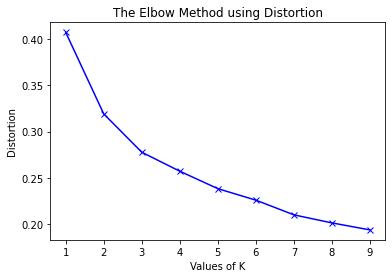

In [151]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

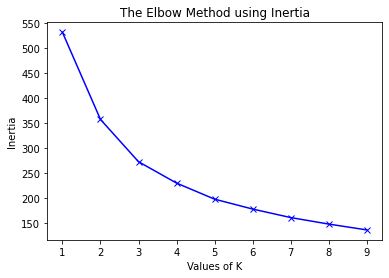

In [152]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=... , method=...,metric=...),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering





## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 